In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import mahotas

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [2]:
data_path = 'Dataset/'

In [3]:
categories = os.listdir(data_path)
categories

['daisy', 'windflower']

In [4]:
def fd_hu_moments(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    feature = cv2.HuMoments(cv2.moments(image)).flatten()
    return feature

In [5]:
def fd_haralick(image):
    # convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # compute the haralick texture feature vector
    haralick = mahotas.features.haralick(gray).mean(axis=0)
    # return the result
    return haralick

In [35]:
def fd_histogram(image, mask=None):
    # convert the image to HSV color-space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    # compute the color histogram
    hist  = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    # normalize the histogram
    cv2.normalize(hist, hist)
    # return the histogram
    return hist.flatten()

In [36]:
images = []
fitur_moment = []
fitur_haralick = []
fitur_histogram = []
fitur_global = []
labels = []

for index, category in enumerate (categories):
    for image_name in os.listdir(data_path + '/' + category):
        img = cv2.imread(data_path + '/' + category + '/' + image_name)
        
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        fv_hu_moments = fd_hu_moments(img)
        fv_haralick   = fd_haralick(img)
        fv_histogram  = fd_histogram(img)
        
        #img = cv2.resize(img, (96, 96))
        
        global_feature = np.hstack([fv_histogram, fv_haralick, fv_hu_moments])
        
        images.append(img)
        
        fitur_moment.append(fv_hu_moments)
        fitur_haralick.append(fv_haralick)
        fitur_histogram.append(fv_histogram)
        
        fitur_global.append(global_feature)
        
        labels.append(index)

In [37]:
images = np.array(images)

fitur_moment = np.array(fitur_moment)
fitur_haralick = np.array(fitur_haralick)
fitur_histogram = np.array(fitur_histogram)

fitur_global = np.array(fitur_global)

labels = np.array(labels)

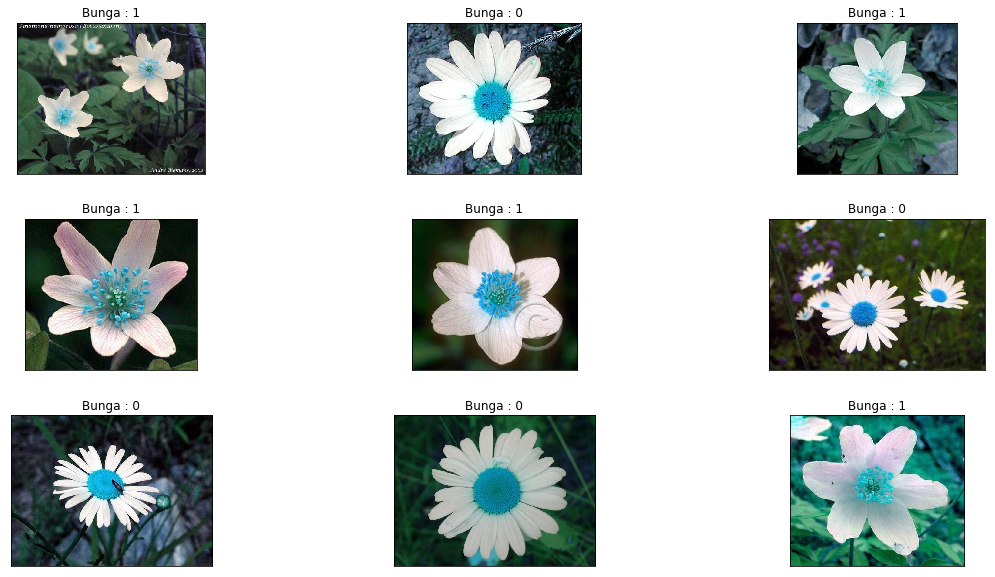

In [83]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]], cmap='gray')
        
        plt.title('Bunga : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [40]:
print('Fitur Hu Moment')
print(fitur_moment[0], fitur_moment.shape)
print('Fitur Haralick')
print(fitur_haralick[0], fitur_haralick.shape)
print('Fitur Histogram')
print(fitur_histogram[0], fitur_histogram.shape)
print('Fitur Global')
print(fitur_global[0], fitur_global.shape)
print('Label Shape')
print(labels.shape)

Fitur Hu Moment
[ 9.80090969e-04  2.59796563e-09  3.25741191e-12  9.43707123e-13
  1.01071209e-24  2.36492771e-17 -1.31001976e-24] (160, 7)
Fitur Haralick
[ 1.69554219e-03  2.05028895e+02  9.85681354e-01  7.15845630e+03
  3.17406312e-01  2.25811106e+02  2.84287963e+04  7.63725959e+00
  1.09555499e+01  4.37131411e-04  3.76521947e+00 -3.63411227e-01
  9.95844539e-01] (160, 13)
Fitur Histogram
[3.04934252e-02 8.08619112e-02 5.57758659e-03 2.16033286e-03
 2.26507639e-03 3.12920939e-03 6.41553383e-03 7.00903654e-01
 6.62502088e-03 1.06668070e-01 2.76784468e-02 1.80682389e-03
 6.67739252e-04 3.14230245e-04 5.76088787e-04 8.20926484e-03
 1.29619974e-03 9.24622491e-02 1.48984417e-01 2.69714296e-02
 3.14230245e-04 3.79694859e-04 7.46296835e-04 4.16355068e-03
 2.61858542e-04 2.86996942e-02 5.07612750e-02 1.34333428e-02
 3.01137305e-04 4.97531204e-04 1.03434117e-03 2.98518734e-03
 3.92787806e-05 1.44022191e-03 3.27323156e-04 1.70208048e-04
 2.74951453e-04 9.16504883e-04 1.76754512e-03 2.61858525e

In [41]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [42]:
rescaled_features = scaler.fit_transform(fitur_global)

In [46]:
log_pipeline = Pipeline([('model logistic', LogisticRegression())])
knn_pipeline = Pipeline([('model neighbors', KNeighborsClassifier(n_neighbors=3))])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(rescaled_features, labels, test_size=0.33, random_state=42)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(107, 532)
(53, 532)
(107,)
(53,)


In [49]:
log_model = LogisticRegression().fit(X_train, y_train)
knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

C:\Users\novus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
print(log_model)
print(knn_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')


In [51]:
log_pred = log_model.predict(X_test)
knn_pred = knn_model.predict(X_test)

In [54]:
print('Logistic Regression Evaluation')
print('Confusion Matrix:\n', confusion_matrix(log_pred, y_test))
print(classification_report(log_pred, y_test))

Logistic Regression Evaluation
Confusion Matrix:
 [[25  5]
 [ 2 21]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.81      0.91      0.86        23

   micro avg       0.87      0.87      0.87        53
   macro avg       0.87      0.87      0.87        53
weighted avg       0.87      0.87      0.87        53



In [55]:
print('KNN Evaluation')
print('Confusion Matix:\n', confusion_matrix(knn_pred, y_test))
print(classification_report(knn_pred, y_test))

KNN Evaluation
Confusion Matix:
 [[24  5]
 [ 3 21]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.81      0.88      0.84        24

   micro avg       0.85      0.85      0.85        53
   macro avg       0.85      0.85      0.85        53
weighted avg       0.85      0.85      0.85        53



In [60]:
X_train[0].shape

(532,)

In [90]:
log_model.predict(X_test[0:5])

array([1, 0, 1, 0, 1])

In [58]:
y_train_hot = to_categorical(y_train.ravel(), 2)
#y_val_hot = to_categorical(y_val.ravel(), 10)
y_test_hot = to_categorical(y_test.ravel(), 2)

print('y_train_hot.shape =',y_train_hot.shape)
#print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (107, 2)
y_test_hot.shape  = (53, 2)


In [72]:
model_ann = Sequential([
  Dense(512, input_shape=(532,), activation="relu"),
  Dense(512, activation="relu"),
  Dense(512, activation="relu"),
  Dense(2, activation="sigmoid")
])

model_ann.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               272896    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 1026      
Total params: 799,234
Trainable params: 799,234
Non-trainable params: 0
_________________________________________________________________


In [73]:
# Compile model
model_ann.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


num_epochs = 25
batch_size = 80

hist_ann = model_ann.fit(X_train, y_train_hot, 
          #validation_data=(X_val, y_val_hot),
          epochs=num_epochs, batch_size=batch_size, 
          verbose=2)

Epoch 1/25
 - 0s - loss: 0.6872 - acc: 0.5981
Epoch 2/25
 - 0s - loss: 0.6286 - acc: 0.7009
Epoch 3/25
 - 0s - loss: 0.5233 - acc: 0.9065
Epoch 4/25
 - 0s - loss: 0.3942 - acc: 0.8879
Epoch 5/25
 - 0s - loss: 0.2327 - acc: 0.9252
Epoch 6/25
 - 0s - loss: 0.1677 - acc: 0.9533
Epoch 7/25
 - 0s - loss: 0.0837 - acc: 0.9626
Epoch 8/25
 - 0s - loss: 0.0351 - acc: 0.9907
Epoch 9/25
 - 0s - loss: 0.0090 - acc: 1.0000
Epoch 10/25
 - 0s - loss: 0.0042 - acc: 1.0000
Epoch 11/25
 - 0s - loss: 0.0025 - acc: 1.0000
Epoch 12/25
 - 0s - loss: 0.0019 - acc: 1.0000
Epoch 13/25
 - 0s - loss: 0.0012 - acc: 1.0000
Epoch 14/25
 - 0s - loss: 5.4535e-04 - acc: 1.0000
Epoch 15/25
 - 0s - loss: 3.3299e-04 - acc: 1.0000
Epoch 16/25
 - 0s - loss: 3.0382e-04 - acc: 1.0000
Epoch 17/25
 - 0s - loss: 2.2019e-04 - acc: 1.0000
Epoch 18/25
 - 0s - loss: 1.2711e-04 - acc: 1.0000
Epoch 19/25
 - 0s - loss: 6.4862e-05 - acc: 1.0000
Epoch 20/25
 - 0s - loss: 3.5974e-05 - acc: 1.0000
Epoch 21/25
 - 0s - loss: 2.1230e-05 - ac

In [74]:
ann_pred = model_ann.evaluate(X_test, y_test_hot, verbose=1)
print("\nModel Accuracy: %.2f%%" % (ann_pred[1]*100))

53/53 [==============================] - 0s 3ms/sample - loss: 0.4823 - acc: 0.9434

Model Accuracy: 94.34%


In [93]:
model_ann.predict_classes(X_test[0:5])

array([1, 1, 1, 0, 1], dtype=int64)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.33, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(107, 96, 96, 3)
(53, 96, 96, 3)
(107,)
(53,)


In [26]:
from tensorflow.keras.utils import to_categorical

y_train_hot = to_categorical(y_train.ravel(), 2)
#y_val_hot = to_categorical(y_val.ravel(), 10)
y_test_hot = to_categorical(y_test.ravel(), 2)

print('y_train_hot.shape =',y_train_hot.shape)
#print('y_val_hot.shape   =',y_val_hot.shape)
print('y_test_hot.shape  =',y_test_hot.shape)

y_train_hot.shape = (107, 2)
y_test_hot.shape  = (53, 2)


In [27]:
y_train[0]

1

In [28]:
y_train_hot[0]

array([0., 1.], dtype=float32)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [29]:
model_cnn = Sequential([
  Conv2D(64,(5,5),input_shape=(96,96,3), padding='same', activation="relu"),
  MaxPooling2D(),
  Conv2D(32,(5,5), padding='same', activation="relu"),
  MaxPooling2D(),
  Flatten(),
  Dense(256, activation="relu"),
  Dense(128, activation="relu"),
  Dense(2, activation="softmax")
])

model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 96, 96, 64)        4864      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 32)        51232     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
__________

In [30]:
# Compile model
model_cnn.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])


num_epochs = 15
batch_size = 1000

hist_cnn = model_cnn.fit(X_train, y_train_hot, 
          #validation_data=(X_val, y_val_hot),
          epochs=num_epochs, batch_size=batch_size, 
          verbose=2)

Epoch 1/15
 - 3s - loss: 6.1510 - acc: 0.5234
Epoch 2/15
 - 2s - loss: 7.9837 - acc: 0.5047
Epoch 3/15
 - 2s - loss: 7.9837 - acc: 0.5047
Epoch 4/15
 - 2s - loss: 7.9837 - acc: 0.5047
Epoch 5/15
 - 2s - loss: 7.9837 - acc: 0.5047
Epoch 6/15
 - 2s - loss: 7.9837 - acc: 0.5047
Epoch 7/15
 - 2s - loss: 7.9837 - acc: 0.5047
Epoch 8/15
 - 2s - loss: 7.9837 - acc: 0.5047
Epoch 9/15
 - 2s - loss: 7.9837 - acc: 0.5047
Epoch 10/15
 - 2s - loss: 7.9837 - acc: 0.5047
Epoch 11/15
 - 2s - loss: 7.9837 - acc: 0.5047
Epoch 12/15
 - 2s - loss: 7.9837 - acc: 0.5047
Epoch 13/15
 - 2s - loss: 7.9837 - acc: 0.5047
Epoch 14/15
 - 2s - loss: 7.9837 - acc: 0.5047
Epoch 15/15
 - 2s - loss: 7.9837 - acc: 0.5047


In [37]:
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation="relu",input_shape=(400,400,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(2,2)))

#2 conv layer
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

#1 dense layer
model.add(Dense(4096 ,activation="relu"))

model.add(Dropout(0.4))

#2 dense layer
model.add(Dense(1024,activation="relu"))

model.add(Dropout(0.4))

#output layer
model.add(Dense(2,activation="softmax"))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 400, 400, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 200, 200, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)        

In [42]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [43]:
%%time
model.fit(X_train, y_train, epochs=100)

KeyboardInterrupt: 